In [1]:
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt

In [201]:
import seaborn as sns

<H1>how to deal with missing data

In [2]:
#create dataframe
df = {'A' :[1,2,np.nan], 'B' :[3, np.nan, np.nan]}
df = pd.DataFrame(df)

In [3]:
df

,A,B
0,1.0,3.0
1,2.0,NaN
2,NaN,NaN


In [4]:
#check if any misssing values(boolean)
df.isnull()

,A,B
0,False,False
1,False,True
2,True,True


In [5]:
#for larger dataset, we need to know total number of missing values by column
df.isnull().sum()

A    1
B    2
dtype: int64

In [6]:
#sum up total number of missing values for the entire dataframe
df.isnull().sum().sum()

3

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


In [7]:
#drop all missing values
df.dropna()

,A,B
0,1.0,3.0


In [11]:
#drop na values only from columns
df.dropna(axis=1)

""
0
1
2


In [13]:
#set a threshold(na values will only be dropped if that threshold is met)
df.dropna(axis=1,thresh=2)

,A
0,1.0
1,2.0
2,NaN


In [12]:
#fill the missing value with the one you specify 
df.fillna(value="new")

,A,B
0,1.0,3.0
1,2.0,new
2,new,new


<H1>Professor salary dataset

In [14]:
df1 = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv")
df1

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [15]:
#check column and row number
df1.shape

(397, 7)

In [16]:
#the average of salary:$113,706
#the average year of service is 17.6yrs
#the average year since phD is 22.3yrs
#the longest year of service is 60 years

df1.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [17]:
df1.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'yrs.since.phd'}>],
       [<AxesSubplot:title={'center':'yrs.service'}>,
        <AxesSubplot:title={'center':'salary'}>]], dtype=object)

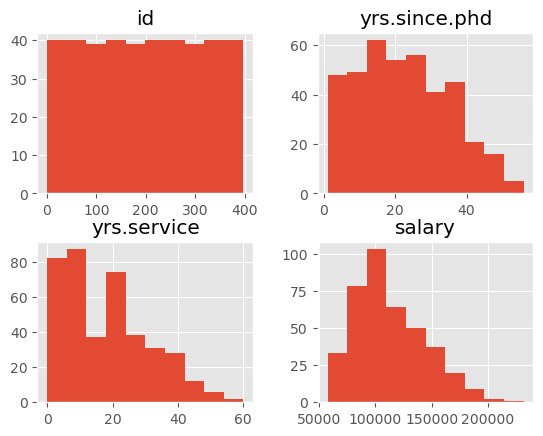

In [230]:
df1.hist()

In [19]:
#there's no missing value
df1.isnull().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [22]:
#the average of salary:$113,706

df1['salary'].mean()

113706.45843828715

In [26]:
#rename some columns
df1.rename(columns = {'Unnamed: 0' : 'id', 'rank':'title'}, inplace = True)


In [40]:
df1

,id,title,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [214]:
#groupby genders, check the average salary of male and female
avg_salary = df1.groupby('sex')['salary'].mean()
avg_salary

sex
Female    101002.410256
Male      115090.418994
Name: salary, dtype: float64

In [33]:
#groupby genders, check the median salary of male and female

gender_salary = df1.groupby('sex')['salary'].median()
gender_salary

sex
Female    103750.0
Male      108043.0
Name: salary, dtype: float64

In [79]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.5.2


<font color=steel size=5 face=雅黑><mark style=background-color:yellow>1. Average salary of male is higher than female</mark><font>

<AxesSubplot:xlabel='sex'>

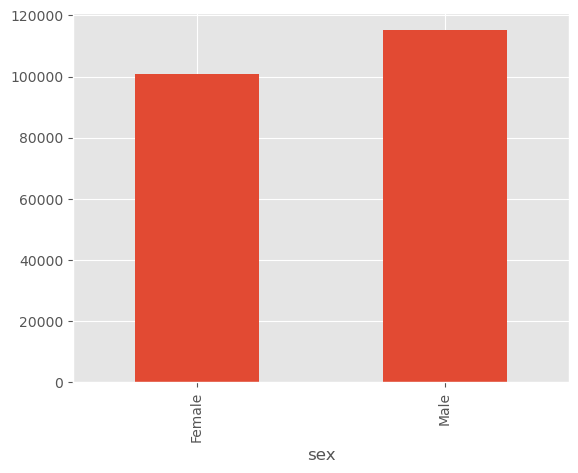

In [220]:
#average salary by gender

avg_salary.plot(kind = 'bar')

<AxesSubplot:xlabel='sex', ylabel='salary'>

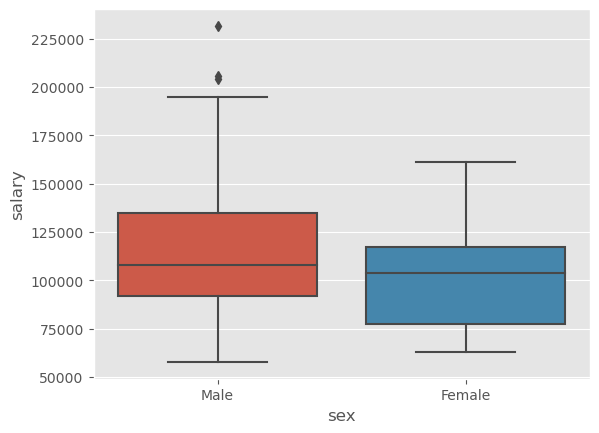

In [218]:
sns.boxplot(x='sex', y='salary', data=df1)


<font color=steel size=5 face=雅黑><mark style=background-color:yellow>2.Longer service years can get higher salary</mark><font>

In [90]:
title_salary1= df1[['title','salary', 'yrs.since.phd', 'yrs.service']]
title_salary1

,title,salary,yrs.since.phd,yrs.service
0,Prof,139750,19,18
1,Prof,173200,20,16
2,AsstProf,79750,4,3
3,Prof,115000,45,39
4,Prof,141500,40,41
...,...,...,...,...
392,Prof,103106,33,30
393,Prof,150564,31,19
394,Prof,101738,42,25
395,Prof,95329,25,15


In [222]:
#the relationship of title and salary

title_salary1.groupby('title', axis =0).mean()

,salary,yrs.since.phd,yrs.service
title,,,
AssocProf,93876.437500,15.453125,11.953125
AsstProf,80775.985075,5.104478,2.373134
Prof,126772.109023,28.300752,22.815789


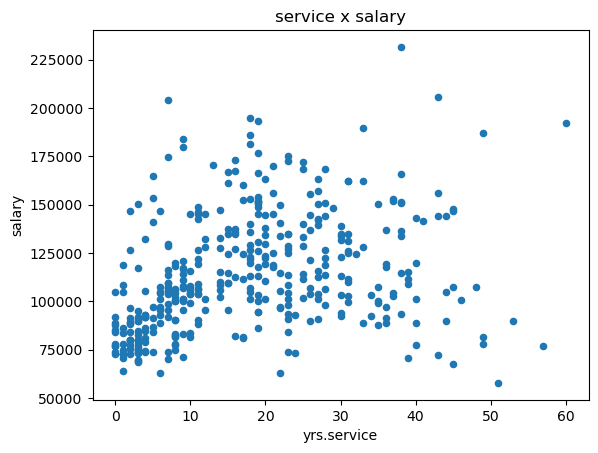

In [41]:
df1.plot.scatter(x='yrs.service', y='salary')
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.title('service x salary')

plt.show()

<font color=steel size=5 face=雅黑><mark style=background-color:yellow>3.Higher title get higher salary</mark><font>

In [38]:
#the relationship of title and salary
#second parameter must have unique value

title_salary = df1.groupby('title')['salary'].median().sort_values(ascending=False)
title_salary

title
Prof         123321.5
AssocProf     95626.5
AsstProf      79800.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='title'>

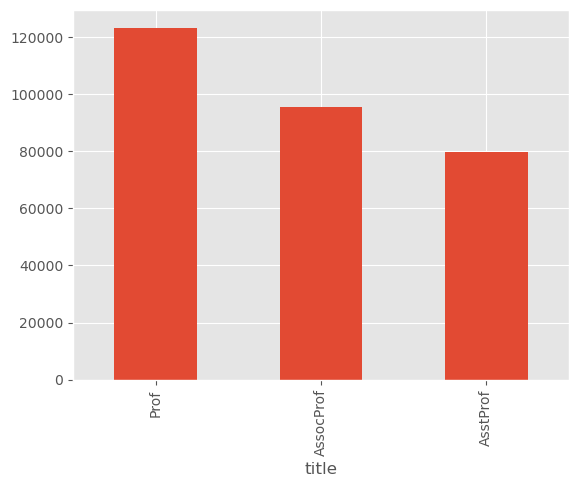

In [95]:
title_salary.plot(kind = 'bar')

<font color=steel size=5 face=雅黑><mark style=background-color:yellow>4.Basically, the more years graduted from PhD,  get higher salary </mark><font>

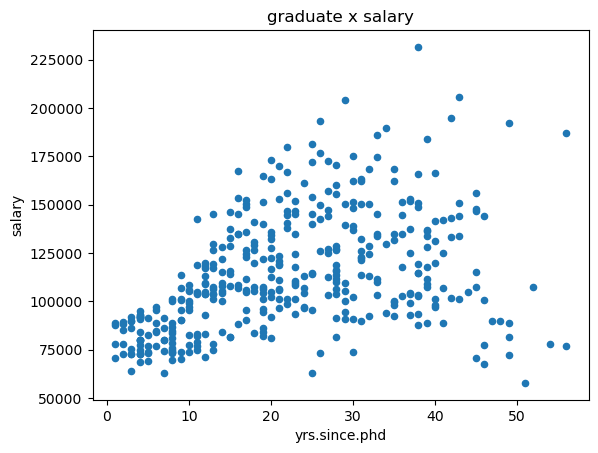

In [31]:
df1.plot.scatter(x='yrs.since.phd', y='salary')
plt.xlabel('yrs.since.phd')
plt.ylabel('salary')
plt.title('graduate x salary')

plt.show()

<font color=steel size=5 face=雅黑><mark style=background-color:yellow>5. Male professors are much more than female professores</mark><font>

In [60]:
gender = df1.groupby('sex').count()
gender

,id,title,discipline,yrs.since.phd,yrs.service,salary
sex,,,,,,
Female,39,39,39,39,39,39
Male,358,358,358,358,358,358


<font color=steel size=5 face=雅黑><mark style=background-color:yellow>6. The percentage of title between male and female</mark><font>

In [61]:
gender_title = df1.groupby(['sex', 'title'])['id'].count()
gender_title

sex     title    
Female  AssocProf     10
        AsstProf      11
        Prof          18
Male    AssocProf     54
        AsstProf      56
        Prof         248
Name: id, dtype: int64

<H2>Male has higher percentage of Professor

<AxesSubplot:xlabel='sex,title'>

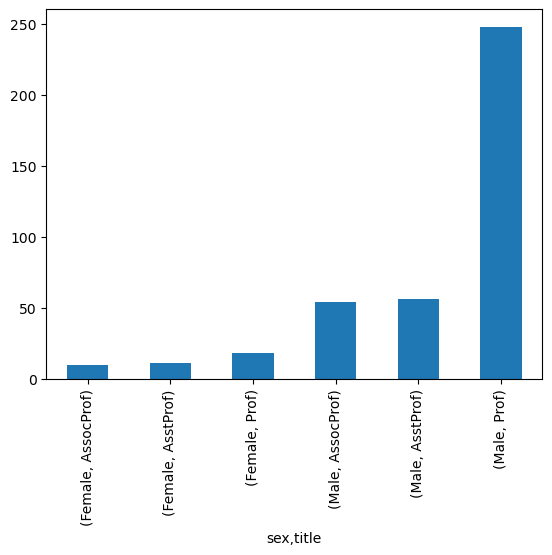

In [62]:
gender_title.plot(kind='bar')

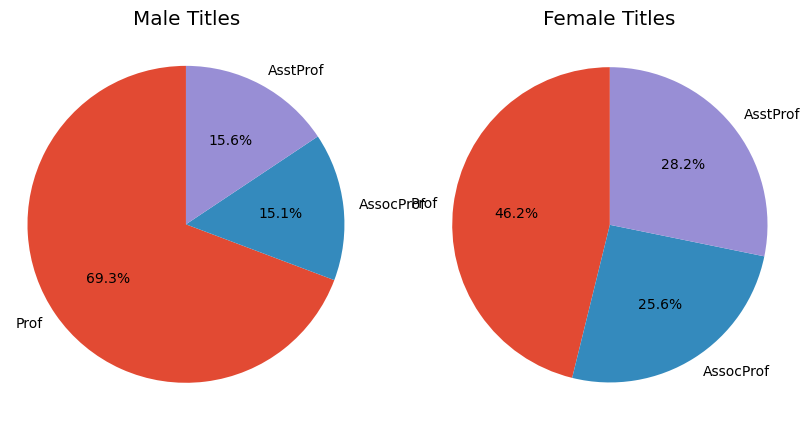

In [217]:
# Sample data
data = {
    'Title': ['Prof', 'AssocProf', 'AsstProf'],
    'Male': [248, 54, 56],
    'Female': [18, 10, 11]
}

# Calculate the percentages
male_percentages = [x / sum(data['Male']) * 100 for x in data['Male']]
female_percentages = [x / sum(data['Female']) * 100 for x in data['Female']]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the first pie chart for male titles
ax1.pie(male_percentages, labels=data['Title'], autopct='%1.1f%%', startangle=90)
ax1.set_title("Male Titles")

# Create the second pie chart for female titles
ax2.pie(female_percentages, labels=data['Title'], autopct='%1.1f%%', startangle=90)
ax2.set_title("Female Titles")

# Equal aspect ratio ensures that pie charts are circular
ax1.axis('equal')
ax2.axis('equal')

# Display the plot
plt.show()


<font color=steel size=5 face=雅黑><mark style=background-color:yellow>7. Average salary of male and female by title</mark><font>

<H2>NO matter which title, males' salary are higher than females'

In [176]:
gender_title_salary = df1.groupby(['title','sex'])['salary'].mean()
gender_title_salary

title      sex   
AssocProf  Female     88512.800000
           Male       94869.703704
AsstProf   Female     78049.909091
           Male       81311.464286
Prof       Female    121967.611111
           Male      127120.822581
Name: salary, dtype: float64

<AxesSubplot:xlabel='title,sex'>

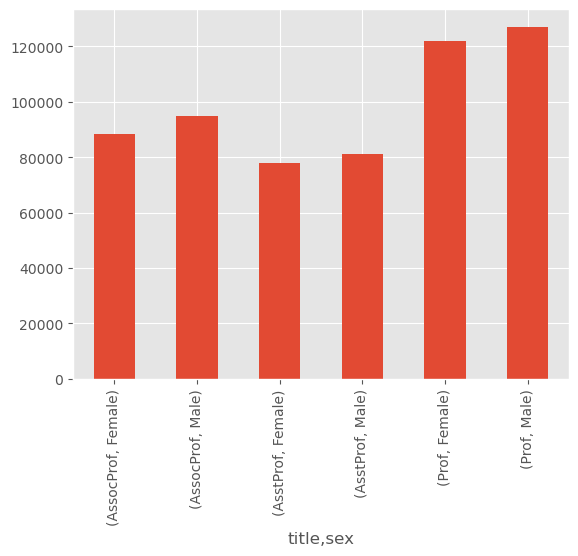

In [177]:
gender_title_salary.plot(kind='bar')

In [226]:
df1['salary'] = df1['salary'].astype(float)

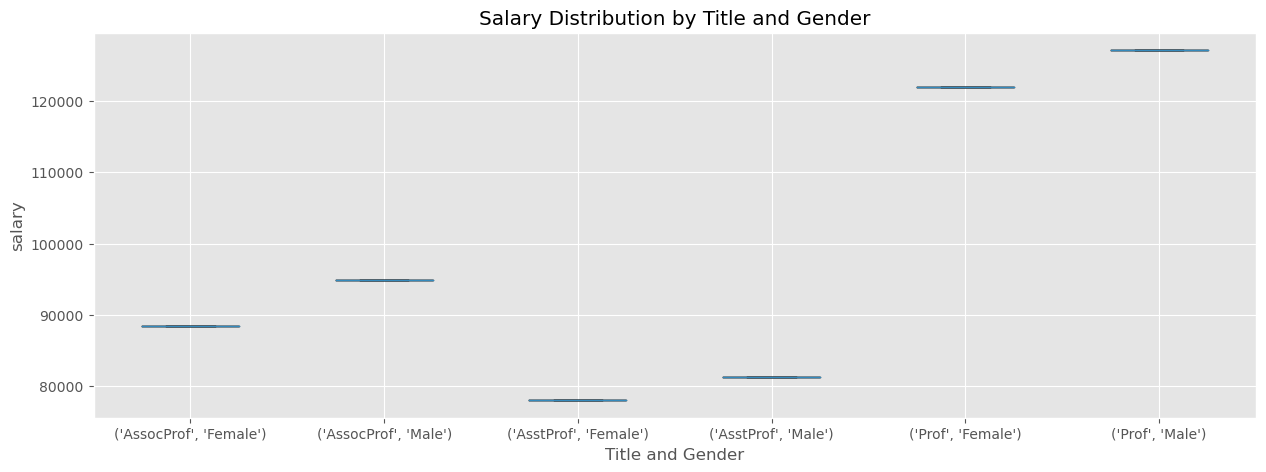

In [228]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Create an empty list to store the data for each group
boxplot_data = []

# Iterate over the grouped data and extract the salary values for each group
for group_name, group_values in gender_title_salary.groupby(['title', 'sex']):
    boxplot_data.append(group_values.values)

# Create the boxplot
ax.boxplot(boxplot_data)

# Set labels for x and y axes
ax.set_xlabel('Title and Gender')
ax.set_ylabel('salary')

# Set x-axis tick labels
ax.set_xticklabels(gender_title_salary.index)

# Set title
ax.set_title('Salary Distribution by Title and Gender')

# Display the plot
plt.show()

In [172]:
print(df1.dtypes)

id                 int64
title             object
discipline        object
yrs.since.phd      int64
yrs.service        int64
sex               object
salary           float64
dtype: object


<font color=steel size=5 face=雅黑><mark style=background-color:yellow>8.The relationship between salary and title, gender, years of service, years after PhD</mark><font>

In [208]:
filtered_data = df1[['salary', 'title', 'sex', 'yrs.service', 'yrs.since.phd']]


In [209]:
filtered_data['salary'] = pd.to_numeric(filtered_data['salary'])
filtered_data['yrs.service'] = pd.to_numeric(filtered_data['yrs.service'])
filtered_data['yrs.since.phd'] = pd.to_numeric(filtered_data['yrs.since.phd'])


/var/folders/7b/vxx6db214mngjcc97mk085qc0000gn/T/ipykernel_82699/2287683162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['salary'] = pd.to_numeric(filtered_data['salary'])
/var/folders/7b/vxx6db214mngjcc97mk085qc0000gn/T/ipykernel_82699/2287683162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['yrs.service'] = pd.to_numeric(filtered_data['yrs.service'])
/var/folders/7b/vxx6db214mngjcc97mk085qc0000gn/T/ipykernel_82699/2287683162.py:3: SettingWithCopyWarning: 
A value i

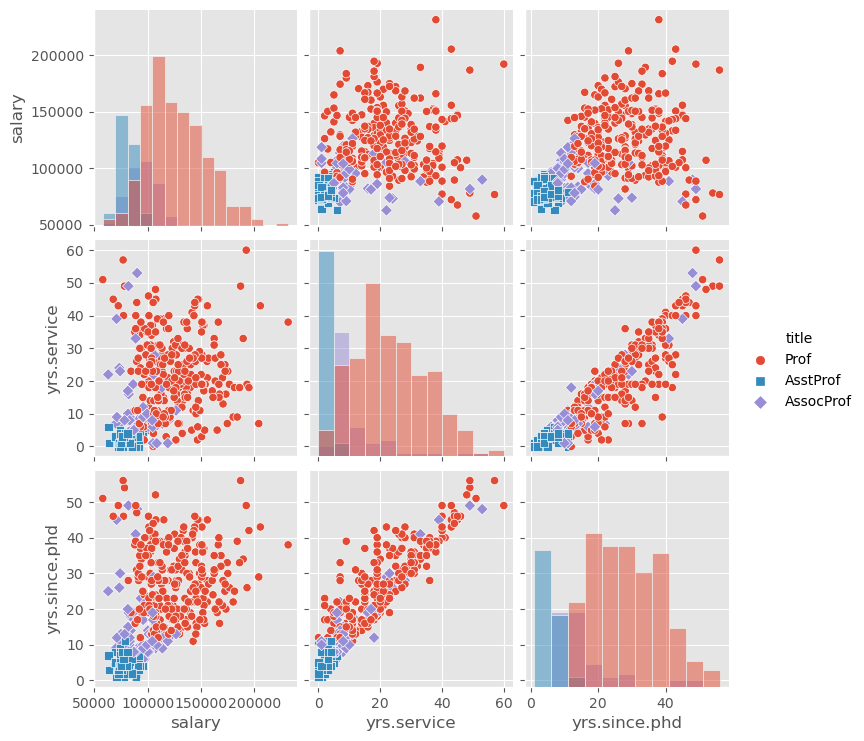

In [212]:
sns.pairplot(filtered_data, hue='title', markers=['o', 's', 'D'], diag_kind='hist')
plt.show()

<font color=steel size=5 face=雅黑><mark style=background-color:yellow>9.gender and yrs of service</mark><font>

In [224]:
gender_sevice= df1.groupby('sex')['yrs.service'].mean().sort_values(ascending=False)
gender_sevice

sex
Male      18.273743
Female    11.564103
Name: yrs.service, dtype: float64

<AxesSubplot:xlabel='sex'>

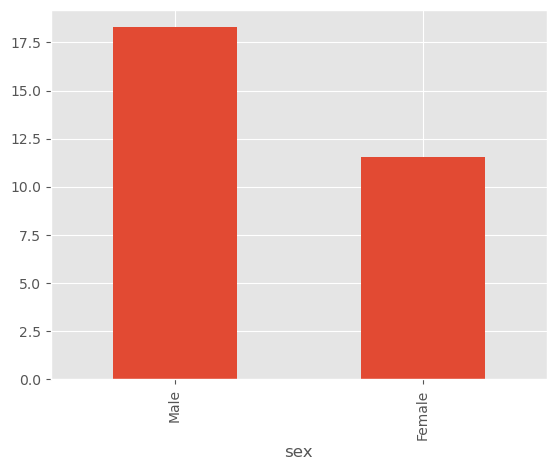

In [225]:
gender_sevice.plot(kind='bar')